In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


In [134]:
# pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 717.7 kB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 971.7 kB/s eta 0:00:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 KB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 732.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 163.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 176.0 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 365.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 255

In [2]:
# reading csv local file
# df= pd.read_csv("./data/disease.csv")
# df.head()

In [3]:
# df.describe()

In [4]:
# df.isna().sum()

In [5]:
# df.isnull().sum()

In [6]:
# cols = df.columns
# data = df[cols].values.flatten()

# s = pd.Series(data)
# s = s.str.strip()
# s = s.values.reshape(df.shape)

# df = pd.DataFrame(s, columns=df.columns)
# df

In [7]:
# df["Symptoms"] = 0
# records = df.shape[0]
# for i in range(records):
#     values = df.iloc[i].values
#     values = values.tolist()
#     if 0 in values:
#         df["Symptoms"][i] = values[1:values.index(0)]
#     else:
#         df["Symptoms"][i] = values[1:]
# df.head()

In [8]:
# df = df.fillna(0)
# df.head()

In [9]:
# column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
#        'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
#        'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
#        'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()
# symps = pd.unique(column_values)
# symps = symps.tolist()
# symps = [i for i in symps if str(i) != "nan"]
# symptoms = pd.DataFrame(columns = symps,index = df.index)
# symptoms

In [10]:
# symptoms["Symptoms"] = df["Symptoms"]
# for i in symps:
#     symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)
# symptoms["prognosis"] = df["prognosis"]
# symptoms = symptoms.drop("Symptoms",axis=1)
# df=symptoms
# df.head()

In [11]:
# df["Disease"].value_counts()

In [12]:
# disease_counts = df["Disease"].value_counts()
# temp_df = pd.DataFrame({
#     "Disease": disease_counts.index,
#     "Counts": disease_counts.values
# })
 
# plt.figure(figsize = (18,8))
# sns.barplot(x = "Disease", y = "Counts", data = temp_df)
# plt.xticks(rotation=90)
# plt.show()

In [13]:
# df.to_csv("cleaned_data.csv",index=False)

In [1]:

# encoder = LabelEncoder()
# df["prognosis"] = encoder.fit_transform(df["prognosis"])
# df


NameError: name 'LabelEncoder' is not defined

In [66]:
trdf=pd.read_csv('./data/training.csv').dropna(axis=1)
tsdf=pd.read_csv('./data/testing.csv')
# trdf["prognosis"].unique()
encoder = LabelEncoder()
trdf["prognosis"] = encoder.fit_transform(trdf["prognosis"])
tsdf["prognosis"] = encoder.transform(tsdf["prognosis"])
features = trdf.drop("prognosis",axis=1)
label = trdf["prognosis"].copy()
feature_train,feature_test,label_train,label_test = train_test_split(features,label,test_size=0.2,random_state=24,shuffle=True)

print(f"Train: {feature_train.shape}, {label_train.shape}")
print(f"Test: {feature_test.shape}, {label_test.shape}")

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [16]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, features, label):
    return accuracy_score(label, estimator.predict(features))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, features, label, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [17]:
svm_model = SVC()
svm_model.fit(feature_train, label_train)
svm_prediction = svm_model.predict(feature_test)
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(label_train, svm_model.predict(feature_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(label_test, svm_prediction)*100}")

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


In [18]:
# cf_matrix = confusion_matrix(label_test, svm_prediction)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for SVM Classifier on Test Data")
# plt.show()

In [19]:
# Training and testing Naive Bayes Classifier
bayes_model = GaussianNB()
bayes_model.fit(feature_train, label_train)
bays_prediction = bayes_model.predict(feature_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(label_train, bayes_model.predict(feature_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(label_test, bays_prediction)*100}")
# cf_matrix = confusion_matrix(label_test, bays_prediction)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
# plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


In [20]:
# Training and testing Random Forest Classifier
rmf_model = RandomForestClassifier(random_state=18)
rmf_model.fit(feature_train, label_train)
rmf_prediction = rmf_model.predict(feature_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(label, rmf_model.predict(features))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(label_test, rmf_prediction)*100}")
 
# cf_matrix = confusion_matrix(label_test, rmf_prediction)
# plt.figure(figsize=(12,8))
# sns.heatmap(cf_matrix, annot=True)
# plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
# plt.show()

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


In [21]:

# Training the models on whole data
final_svm_model = SVC()
final_bayes_model = GaussianNB()
final_rmf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(features, label)
final_bayes_model.fit(features, label)
final_rmf_model.fit(features, label)


RandomForestClassifier(random_state=18)

In [22]:
feature_testing = trdf.drop("prognosis",axis=1)
label_testing = trdf["prognosis"].copy()
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(feature_testing)
nb_preds = final_bayes_model.predict(feature_testing)
rf_preds = final_rmf_model.predict(feature_testing)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]

In [23]:
# print(f"Accuracy on Test dataset by the combined model\
# : {accuracy_score(label_testing, final_preds)*100}")
print('F1-score% =', f1_score(label_testing, final_preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(label_testing, final_preds)*100)
# cf_matrix = confusion_matrix(label_testing, final_preds)
# plt.figure(figsize=(12,8))
 
# sns.heatmap(cf_matrix, annot = True)
# plt.title("Confusion Matrix for Combined Model on Test Dataset")
# plt.show()

F1-score% = 100.0 | Accuracy% = 100.0


In [127]:
symptoms = features.columns.values

def getIndex(symp):
 for index,value in enumerate(symptoms):
     if (symp.casefold()==value.casefold()):
         return index

symptom_index = {}

for index,value in enumerate(symptoms):
    symptom_index[value] = index
    
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

def predictDisease(symp):
  symp=symp.replace(" ","_")
  print(symp)
  split_simp = symp.split(",")
    
  input_data = [0] * len(data_dict["symptom_index"])
  for sps in split_simp:
        index = getIndex(sps)
        input_data[index] = 1
  input_data = np.array(input_data).reshape(1,-1)
  # print(input_data)
    #   generating individual outputs
  rf_prediction = data_dict["predictions_classes"][final_rmf_model.predict(input_data)[0]]
  nb_prediction = data_dict["predictions_classes"][final_bayes_model.predict(input_data)[0]]
  svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    # making final prediction by taking mode of all predictions
  final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
  predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": nb_prediction,
        "final_prediction":final_prediction
    }
  print(predictions)
predictDisease("mood swings,weight loss,restlessness,lethargy,patches in throat")

mood_swings,weight_loss,restlessness,lethargy,patches_in_throat
{'rf_model_prediction': 'AIDS', 'naive_bayes_prediction': 'AIDS', 'svm_model_prediction': 'AIDS', 'final_prediction': 'AIDS'}


/home/getch/Documents/My_final_project/smart_patientcare_and_assistance_system/machine_learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/getch/Documents/My_final_project/smart_patientcare_and_assistance_system/machine_learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/getch/Documents/My_final_project/smart_patientcare_and_assistance_system/machine_learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [96]:
#save models
import pickle
svm_model_name="svm_model_file.sav"
bayes_model_name="bayes_model_file.sav"
rmf_model_name="rmf_model_file.sav"
pickle.dump(final_svm_model,open(svm_model_name,'wb'))
pickle.dump(final_bayes_model,open(bayes_model_name,'wb'))
pickle.dump(final_rmf_model,open(rmf_model_name,'wb'))

In [132]:
# load models to test
loaded_model = pickle.load(open("rmf_model_file.sav", 'rb'))
test_data=[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
input_data = np.array(test_data).reshape(1,-1)

result=encoder.classes_[loaded_model.predict(input_data)[0]]
print(result)

Fungal infection


/home/getch/Documents/My_final_project/smart_patientcare_and_assistance_system/machine_learning/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
#using ANN lets get started
import tensorflow as tf


In [55]:
#read training data and create training and testing data
tf_data=pd.read_csv("./data/training.csv")
# tf_data.head()
tf_feature=tf_data.drop(["prognosis"],axis=1)
tf_label=tf_data["prognosis"].copy()
tffeature_train,tffeature_test,tflabel_train,tflabel_test=train_test_split(tf_feature,tf_label,test_size=0.2,random_state=30)
print(tf_feature.shape)
print(tf_label.shape)

(4920, 132)
(4920,)


In [58]:
tflabel_train_dum = pd.get_dummies(tf_label)
# tflabel_train_dum

In [32]:
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

#initialize our ANN model
tf_model=Sequential()
# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
tf_model.add(Dense(64, activation = "relu", input_dim = feature_train.shape[1]))
# adding second hidden layer
tf_model.add(Dense(32, activation = "relu"))
# adding last layer
tf_model.add(Dense(tflabel_train_dum.shape[1], activation = "softmax"))
#compilling the ANN model
tf_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
tf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                8512      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 41)                1353      
                                                                 
Total params: 11,945
Trainable params: 11,945
Non-trainable params: 0
_________________________________________________________________


In [118]:
#fitting ANN model
history = tf_model.fit(tf_feature, tflabel_train_dum, epochs = 5, batch_size = 30)

Epoch 1/5
164/164 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2/5
164/164 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 3/5
164/164 [==============================] - 0s 3ms/step - loss: 8.4465e-04 - accuracy: 1.0000
Epoch 4/5
164/164 [==============================] - 1s 3ms/step - loss: 6.9753e-04 - accuracy: 1.0000
Epoch 5/5
164/164 [==============================] - 1s 3ms/step - loss: 5.8215e-04 - accuracy: 1.0000


In [85]:
disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

# print(disease)
disease_encoder = LabelEncoder()
disease_encoder.fit_transform(disease)

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [94]:
# tf_data["prognosis"].values
# disease = tf.ragged.constant(tf_data["prognosis"].values)

# lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
# lookup.adapt(disease)
# vocab = lookup.get_vocabulary()


# def invert_multi_hot(encoded_labels):
#     """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
#     hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
#     return np.take(vocab, hot_indices)


# print("Vocabulary:\n")
# print(vocab)

In [117]:
#making prediction

predictions=tf_model.predict(tf_feature)
disease_predicted = np.argmax(predictions, axis=-1)
disease_predicted

154/154 [==============================] - 0s 2ms/step


array([15, 15, 15, ..., 38, 35, 27])

In [127]:
symptoms = tf_feature.columns.values
def getIndex(symp):
 for index,value in enumerate(symptoms):
     if (symp.casefold()==value.casefold()):
         return index

symptom_index = {}

for index,value in enumerate(symptoms):
    symptom_index[value] = index
    
data_dict = {
    "symptom_index":symptom_index,
}

def predictDisease(symp):
  symp=symp.replace(" ","_")
  print(symp)
  split_simp = symp.split(",")
    
  input_data = [0] * len(data_dict["symptom_index"])

  for sps in split_simp:
        index = getIndex(sps)
        input_data[index] = 1
  input_data = np.array(input_data).reshape(1,-1)
#   print(input_data)
  predictions= tf_model.predict(input_data)[0]
  
  print(disease_encoder.classes_[ np.argmax(predictions, axis=-1)])
predictDisease("fatigue,cough,high_fever,family_history,mucoid_sputum")



fatigue,cough,high_fever,family_history,mucoid_sputum
1/1 [==============================] - 0s 31ms/step
Bronchial Asthma


In [61]:
history.history["accuracy"]

[1.0, 1.0, 1.0, 1.0, 1.0]

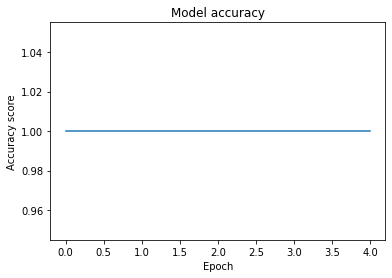

In [62]:
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

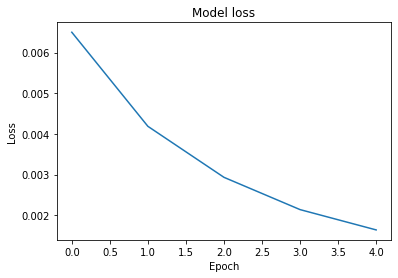

In [63]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [128]:
# save ANN model
tf_model.save("./ann_model")

INFO:tensorflow:Assets written to: ./ann_model/assets


In [129]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 322.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 146.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 407.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
Note: you may need to restart the kernel to use updated packages.


In [130]:
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(tf_model, "./node_tfmodel")